<a href="https://colab.research.google.com/github/MAFarzad/Data-Science-Projects/blob/main/Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
Create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

In [1]:
# Load Libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# Read Data

df = pd.read_csv('wines.csv')
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Analyse Datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280-OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [4]:
#  There is no missing data and all datatypes are good.

In [5]:
# Check for bias.

df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [6]:
# Class 2 is overrepresented and class 3 is underrepresented.
# We ignore this issue for this homework.

In [7]:
# Get features

X = df.drop(['Class'], axis=1).values

In [8]:
# Get labels.
# Since the labels are ordinal numbers, better to use OneHotEncoding

y = pd.get_dummies(df['Class']).values

In [9]:
# Scale features

scaler = StandardScaler()
X_train = scaler.fit_transform(X)

In [10]:
# Create MLP

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(X.shape[1],)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________


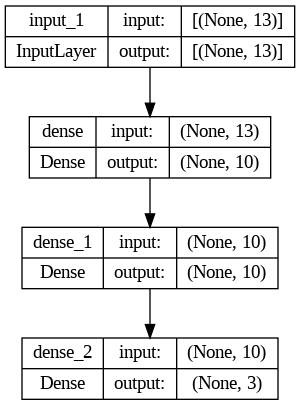

In [11]:
# Visualize MLP

keras.utils.plot_model(model, "my_model.png", show_shapes=True)

In [12]:
# Train MLP

history = model.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
5/5 [==============================] - 1s 48ms/step - loss: 34.6356 - accuracy: 0.5000 - val_loss: 188.0453 - val_accuracy: 0.0000e+00
Epoch 2/200
5/5 [==============================] - 0s 7ms/step - loss: 21.3914 - accuracy: 0.6056 - val_loss: 175.1591 - val_accuracy: 0.0000e+00
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 15.1483 - accuracy: 0.7958 - val_loss: 167.9911 - val_accuracy: 0.0000e+00
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 15.1166 - accuracy: 0.7606 - val_loss: 164.2315 - val_accuracy: 0.0000e+00
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 15.4428 - accuracy: 0.7042 - val_loss: 158.0329 - val_accuracy: 0.0000e+00
Epoch 6/200
5/5 [==============================] - 0s 7ms/step - loss: 14.6211 - accuracy: 0.7183 - val_loss: 149.9385 - val_accuracy: 0.0000e+00
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 13.4224 - accuracy: 0.7465 - val_loss: 142.2245 - va

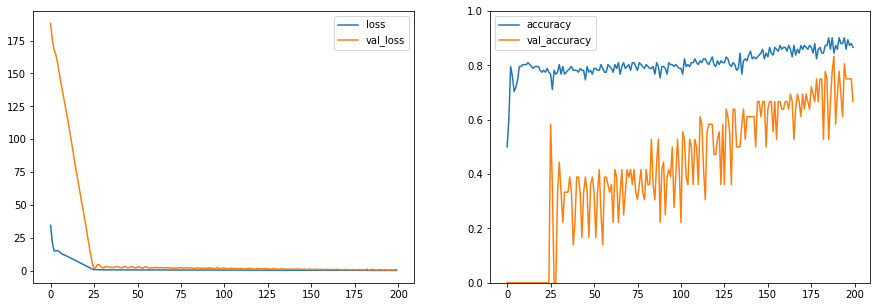

In [13]:
df=pd.DataFrame(history.history)

fig, ax= plt.subplots(1, 2, figsize=(15, 5))

df[['loss', 'val_loss']].plot(ax=ax[0])
df[['accuracy', 'val_accuracy']].plot(ax=ax[1])

plt.gca().set_ylim(0, 1)
plt.show()